**Assignment-2**

Assignment date: 7th October 2022

Student Name: Ranjith S

Student Roll Number: 312819205034

Team Id: PNT2022TMID28596

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [ ]:
pwd

'/content/drive/MyDrive/CNN'

In [ ]:
##unzipping the zip file

!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

**1.Image Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## Creating The Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()

## Adding The Layers

In [ ]:
##Adding Convolution2D Layer

model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [ ]:
##Adding MaxPooling2D Layer

model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
##Adding Flatten Layer

model.add(Flatten())

In [ ]:
##Adding Dense-(Hidden Layers) 

model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [ ]:
##Adding Output Layer

model.add(Dense(5,activation="softmax"))

In [ ]:
##To see the added layers

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                        

## Compiling The Model

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

## Fitting The Model

In [ ]:
len(x_train)

180

In [ ]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
180/180 [==============================] - 70s 383ms/step - loss: 1.2693 - accuracy: 0.4744 - val_loss: 1.1409 - val_accuracy: 0.5221
Epoch 2/10
180/180 [==============================] - 70s 388ms/step - loss: 1.0604 - accuracy: 0.5705 - val_loss: 1.0076 - val_accuracy: 0.6062
Epoch 3/10
180/180 [==============================] - 70s 389ms/step - loss: 0.9596 - accuracy: 0.6273 - val_loss: 1.0320 - val_accuracy: 0.6257
Epoch 4/10
180/180 [==============================] - 71s 394ms/step - loss: 0.9168 - accuracy: 0.6391 - val_loss: 0.9369 - val_accuracy: 0.6354
Epoch 5/10
180/180 [==============================] - 69s 384ms/step - loss: 0.8708 - accuracy: 0.6613 - val_loss: 0.9675 - val_accuracy: 0.6403
Epoch 6/10
180/180 [==============================] - 70s 389ms/step - loss: 0.8234 - accuracy: 0.6785 - val_loss: 0.8326 - val_accuracy: 0.6766
Epoch 7/10
180/180 [==============================] - 68s 379ms/step - loss: 0.7851 - accuracy: 0.6926 - val_loss: 0.7789 - val_ac

## Saving The Model

In [ ]:
model.save('flowers.h5')

## Testing The Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('flowers.h5')

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/CNN/flowers/rose/537207677_f96a0507bb.jpg")

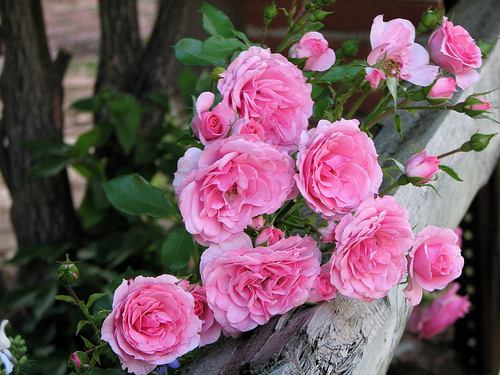

In [ ]:
img

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/CNN/flowers/rose/537207677_f96a0507bb.jpg",target_size=(64,64))

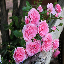

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[ 15.,  16.,  10.],
        [ 22.,  21.,  17.],
        [ 35.,  35.,  25.],
        ...,
        [ 66.,  71.,  67.],
        [ 62.,  69.,  62.],
        [ 53.,  55.,  52.]],

       [[ 19.,  20.,  15.],
        [ 29.,  30.,  25.],
        [ 46.,  43.,  34.],
        ...,
        [ 60.,  61.,  55.],
        [ 67.,  69.,  66.],
        [ 58.,  63.,  57.]],

       [[ 26.,  28.,  23.],
        [ 47.,  44.,  39.],
        [ 47.,  47.,  35.],
        ...,
        [ 70.,  76.,  72.],
        [ 52.,  53.,  48.],
        [ 67.,  72.,  68.]],

       ...,

       [[169., 192., 244.],
        [ 51.,  65.,  66.],
        [ 58.,  94.,  50.],
        ...,
        [  0.,   0.,   0.],
        [ 21.,  16.,  13.],
        [ 41.,  37.,  26.]],

       [[ 17.,  30.,  39.],
        [182., 198., 232.],
        [ 38.,  57.,  29.],
        ...,
        [  0.,   0.,   0.],
        [ 16.,  15.,  11.],
        [ 46.,  40.,  28.]],

       [[ 46.,  81.,  23.],
        [ 35.,  49.,  75.],
        [ 20.,  

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[ 15.,  16.,  10.],
         [ 22.,  21.,  17.],
         [ 35.,  35.,  25.],
         ...,
         [ 66.,  71.,  67.],
         [ 62.,  69.,  62.],
         [ 53.,  55.,  52.]],

        [[ 19.,  20.,  15.],
         [ 29.,  30.,  25.],
         [ 46.,  43.,  34.],
         ...,
         [ 60.,  61.,  55.],
         [ 67.,  69.,  66.],
         [ 58.,  63.,  57.]],

        [[ 26.,  28.,  23.],
         [ 47.,  44.,  39.],
         [ 47.,  47.,  35.],
         ...,
         [ 70.,  76.,  72.],
         [ 52.,  53.,  48.],
         [ 67.,  72.,  68.]],

        ...,

        [[169., 192., 244.],
         [ 51.,  65.,  66.],
         [ 58.,  94.,  50.],
         ...,
         [  0.,   0.,   0.],
         [ 21.,  16.,  13.],
         [ 41.,  37.,  26.]],

        [[ 17.,  30.,  39.],
         [182., 198., 232.],
         [ 38.,  57.,  29.],
         ...,
         [  0.,   0.,   0.],
         [ 16.,  15.,  11.],
         [ 46.,  40.,  28.]],

        [[ 46.,  81.,  23.],
       

In [ ]:
pred=model.predict(x)

In [ ]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index[np.argmax(pred)]

'rose'